### Problem statement
Building a logistic regression model to assign a lead score between 0 and 100 to each of the leads, which can be used by the company to target potential leads

In [3496]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3497]:
data = pd.read_csv('/Users/mrbinit/Downloads/Leads.csv')

In [3498]:
data.shape

(9240, 37)

### Understanding missing value

In [3499]:
missing_value = data.isnull().sum()
print(missing_value)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### Changing columns name


In [3500]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [3501]:
# Dictionary to map old column names to new column names
column_mapping = {
    'Prospect ID': 'Prospect_ID',
    'Lead Number': 'Lead_Number',
    'Lead Origin': 'Lead_Origin',
    'Lead Source': 'Lead_Source',
    'Do Not Email': 'Do_Not_Email',
    'Do Not Call': 'Do_Not_Call',
    'Converted': 'Converted',
    'TotalVisits': 'Total_Visits',
    'Total Time Spent on Website': 'Total_Time_Spent_on_Website',
    'Page Views Per Visit': 'Page_Views_Per_Visit',
    'Last Activity': 'Last_Activity',
    'Country': 'Country',
    'Specialization': 'Specialization',
    'How did you hear about X Education': 'How_did_you_hear_about_X_Education',
    'What is your current occupation': 'Current_Occupation',
    'What matters most to you in choosing a course': 'Matters_Most_Choosing_Course',
    'Search': 'Search',
    'Magazine': 'Magazine',
    'Newspaper Article': 'Newspaper_Article',
    'X Education Forums': 'X_Education_Forums',
    'Newspaper': 'Newspaper',
    'Digital Advertisement': 'Digital_Advertisement',
    'Through Recommendations': 'Through_Recommendations',
    'Receive More Updates About Our Courses': 'Receive_More_Updates',
    'Tags': 'Tags',
    'Lead Quality': 'Lead_Quality',
    'Update me on Supply Chain Content': 'Update_on_Supply_Chain_Content',
    'Get updates on DM Content': 'Update_on_DM_Content',
    'Lead Profile': 'Lead_Profile',
    'City': 'City',
    'Asymmetrique Activity Index': 'Asymmetrique_Activity_Index',
    'Asymmetrique Profile Index': 'Asymmetrique_Profile_Index',
    'Asymmetrique Activity Score': 'Asymmetrique_Activity_Score',
    'Asymmetrique Profile Score': 'Asymmetrique_Profile_Score',
    'I agree to pay the amount through cheque': 'Agree_to_Pay_Cheque',
    'A free copy of Mastering The Interview': 'Free_Copy_Mastering_The_Interview',
    'Last Notable Activity': 'Last_Notable_Activity',
}

# Rename the columns using the mapping
data.rename(columns=column_mapping, inplace=True)

In [3502]:
data.columns

Index(['Prospect_ID', 'Lead_Number', 'Lead_Origin', 'Lead_Source',
       'Do_Not_Email', 'Do_Not_Call', 'Converted', 'Total_Visits',
       'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity',
       'Country', 'Specialization', 'How_did_you_hear_about_X_Education',
       'Current_Occupation', 'Matters_Most_Choosing_Course', 'Search',
       'Magazine', 'Newspaper_Article', 'X_Education_Forums', 'Newspaper',
       'Digital_Advertisement', 'Through_Recommendations',
       'Receive_More_Updates', 'Tags', 'Lead_Quality',
       'Update_on_Supply_Chain_Content', 'Update_on_DM_Content',
       'Lead_Profile', 'City', 'Asymmetrique_Activity_Index',
       'Asymmetrique_Profile_Index', 'Asymmetrique_Activity_Score',
       'Asymmetrique_Profile_Score', 'Agree_to_Pay_Cheque',
       'Free_Copy_Mastering_The_Interview', 'Last_Notable_Activity'],
      dtype='object')

In [3503]:
data.shape

(9240, 37)

In [3504]:
data.head(10)

,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,...,Update_on_DM_Content,Lead_Profile,City,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,Agree_to_Pay_Cheque,Free_Copy_Mastering_The_Interview,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


### finding columns with select


In [3505]:
data.columns[data.isin(['Select']). any()]

Index(['Specialization', 'How_did_you_hear_about_X_Education', 'Lead_Profile',
       'City'],
      dtype='object')

### Replacing select with nan

In [3506]:
# Replace selected values with null values
data = data.replace("Select", np.nan)


In [3507]:
data.columns[data.isin(['Select']). any()]

Index([], dtype='object')

In [3508]:
data.head(10)

,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,...,Update_on_DM_Content,Lead_Profile,City,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,Agree_to_Pay_Cheque,Free_Copy_Mastering_The_Interview,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [3509]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Prospect_ID                         9240 non-null   object 
 1   Lead_Number                         9240 non-null   int64  
 2   Lead_Origin                         9240 non-null   object 
 3   Lead_Source                         9204 non-null   object 
 4   Do_Not_Email                        9240 non-null   object 
 5   Do_Not_Call                         9240 non-null   object 
 6   Converted                           9240 non-null   int64  
 7   Total_Visits                        9103 non-null   float64
 8   Total_Time_Spent_on_Website         9240 non-null   int64  
 9   Page_Views_Per_Visit                9103 non-null   float64
 10  Last_Activity                       9137 non-null   object 
 11  Country                             6779 no

In [3510]:
# column_to_analyze = 'Do_Not_Email'

# def find_outliers(data):
#     # Calculate the first quartile (Q1) and third quartile (Q3)
#     Q1 = np.percentile(data, 25)
#     Q3 = np.percentile(data, 75)
    
#     # Calculate the interquartile range (IQR)
#     IQR = Q3 - Q1
    
#     # Calculate the lower and upper bounds for outliers
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     # Find outliers
#     outliers = data[(data < lower_bound) | (data > upper_bound)]
    
#     return outliers

# # Example usage:
# data_column = data[column_to_analyze]
# outliers = find_outliers(data_column)
# print("Outliers:", outliers)







### Finding categorical variables

In [3511]:
categorical = [var for var in data.columns if data[var].dtype=='O'] #dtype means object

print('The total categorical variables are {}'.format(len(categorical)))
print(categorical)


The total categorical variables are 30
['Prospect_ID', 'Lead_Origin', 'Lead_Source', 'Do_Not_Email', 'Do_Not_Call', 'Last_Activity', 'Country', 'Specialization', 'How_did_you_hear_about_X_Education', 'Current_Occupation', 'Matters_Most_Choosing_Course', 'Search', 'Magazine', 'Newspaper_Article', 'X_Education_Forums', 'Newspaper', 'Digital_Advertisement', 'Through_Recommendations', 'Receive_More_Updates', 'Tags', 'Lead_Quality', 'Update_on_Supply_Chain_Content', 'Update_on_DM_Content', 'Lead_Profile', 'City', 'Asymmetrique_Activity_Index', 'Asymmetrique_Profile_Index', 'Agree_to_Pay_Cheque', 'Free_Copy_Mastering_The_Interview', 'Last_Notable_Activity']


In [3512]:
data[categorical].head()

,Prospect_ID,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Last_Activity,Country,Specialization,How_did_you_hear_about_X_Education,Current_Occupation,...,Lead_Quality,Update_on_Supply_Chain_Content,Update_on_DM_Content,Lead_Profile,City,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Agree_to_Pay_Cheque,Free_Copy_Mastering_The_Interview,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,NaN,NaN,NaN,Unemployed,...,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,NaN,NaN,Unemployed,...,NaN,No,No,NaN,NaN,02.Medium,02.Medium,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,NaN,Student,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,...,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,India,NaN,Other,Unemployed,...,Might be,No,No,NaN,Mumbai,02.Medium,01.High,No,No,Modified


### Missing values in the categorical variable after removing select

In [3513]:
data[categorical].isnull().sum()

Prospect_ID                              0
Lead_Origin                              0
Lead_Source                             36
Do_Not_Email                             0
Do_Not_Call                              0
Last_Activity                          103
Country                               2461
Specialization                        3380
How_did_you_hear_about_X_Education    7250
Current_Occupation                    2690
Matters_Most_Choosing_Course          2709
Search                                   0
Magazine                                 0
Newspaper_Article                        0
X_Education_Forums                       0
Newspaper                                0
Digital_Advertisement                    0
Through_Recommendations                  0
Receive_More_Updates                     0
Tags                                  3353
Lead_Quality                          4767
Update_on_Supply_Chain_Content           0
Update_on_DM_Content                     0
Lead_Profil

In [3514]:
# data = data.drop(['Update_on_DM_Content','Update_on_Supply_Chain_Content', 'Receive_More_Updates', 'Through_Recommendations', 'Digital_Advertisement', 'Search', 'Matters_Most_Choosing_Course', 'Newspaper', 'X_Education_Forums', 'Do_Not_Call', 'Newspaper_Article', 'Agree_to_Pay_Cheque', 'Do_Not_Email', 'Asymmetrique_Profile_Index'], axis = 1, inplace = True)

### Finding Skewed data

In [3515]:
data.columns

Index(['Prospect_ID', 'Lead_Number', 'Lead_Origin', 'Lead_Source',
       'Do_Not_Email', 'Do_Not_Call', 'Converted', 'Total_Visits',
       'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity',
       'Country', 'Specialization', 'How_did_you_hear_about_X_Education',
       'Current_Occupation', 'Matters_Most_Choosing_Course', 'Search',
       'Magazine', 'Newspaper_Article', 'X_Education_Forums', 'Newspaper',
       'Digital_Advertisement', 'Through_Recommendations',
       'Receive_More_Updates', 'Tags', 'Lead_Quality',
       'Update_on_Supply_Chain_Content', 'Update_on_DM_Content',
       'Lead_Profile', 'City', 'Asymmetrique_Activity_Index',
       'Asymmetrique_Profile_Index', 'Asymmetrique_Activity_Score',
       'Asymmetrique_Profile_Score', 'Agree_to_Pay_Cheque',
       'Free_Copy_Mastering_The_Interview', 'Last_Notable_Activity'],
      dtype='object')

In [3516]:
bn = data.Do_Not_Email.value_counts()

<Axes: xlabel='Do_Not_Email'>

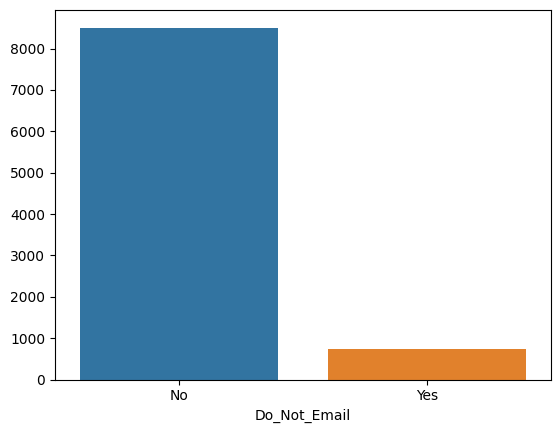

In [3517]:
sns.barplot(x=bn.index, y=bn.values)

In [3518]:
bn = data.Do_Not_Call.value_counts()

<Axes: xlabel='Do_Not_Call'>

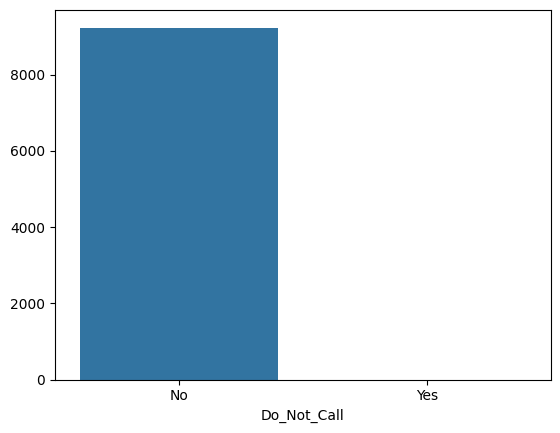

In [3519]:
sns.barplot(x=bn.index, y=bn.values)

In [3520]:
data.Lead_Number.value_counts()

Lead_Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64

In [3521]:
data.Asymmetrique_Activity_Index.value_counts()

Asymmetrique_Activity_Index
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

In [3522]:
data.Free_Copy_Mastering_The_Interview.value_counts()

Free_Copy_Mastering_The_Interview
No     6352
Yes    2888
Name: count, dtype: int64

### Last_Notable_Activity 

In [3523]:
data.Last_Notable_Activity .value_counts()

Last_Notable_Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

<Axes: xlabel='Last_Notable_Activity'>

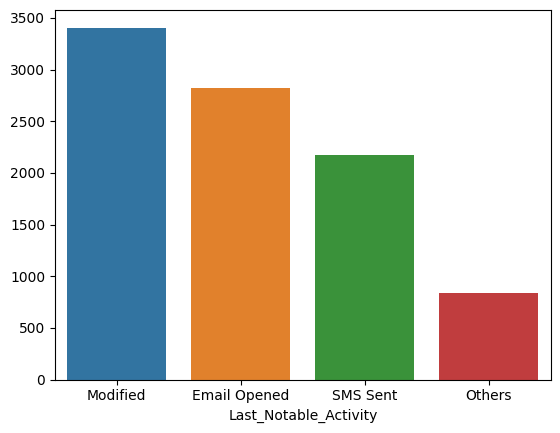

In [3524]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others'
    return data
data = group_low_value_counts(data, column_name = 'Last_Notable_Activity', threshold = 700)
bn = data.Last_Notable_Activity.value_counts()
sns.barplot(x = bn.index, y = bn.values)

### Lead source

In [3525]:
data.Lead_Source.value_counts()

Lead_Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

<Axes: xlabel='Lead_Source'>

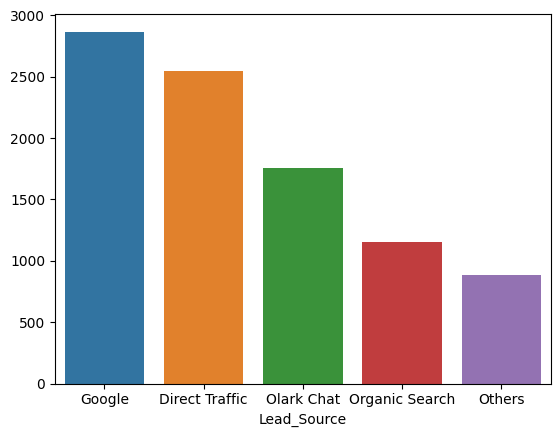

In [3526]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others'
    return data
data = group_low_value_counts(data, column_name = 'Lead_Source', threshold = 700)
bn = data.Lead_Source.value_counts()
sns.barplot(x = bn.index, y = bn.values)

In [3527]:
data.Lead_Origin.value_counts()

Lead_Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

<Axes: xlabel='Lead_Origin'>

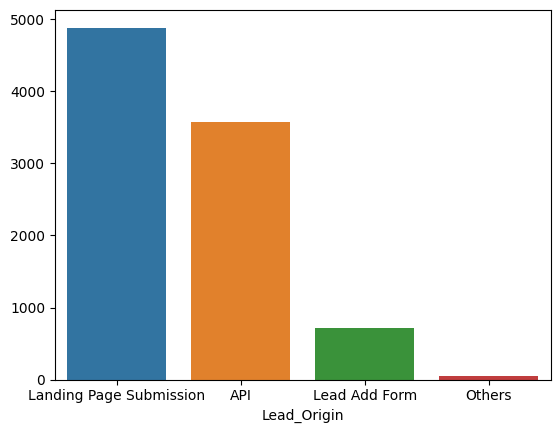

In [3528]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others'
    return data
data = group_low_value_counts(data, column_name = 'Lead_Origin', threshold = 700)
bn = data.Lead_Origin.value_counts()
sns.barplot(x = bn.index, y = bn.values)

### Last activity

In [3529]:
data.Last_Activity.value_counts()

Last_Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

<Axes: xlabel='Last_Activity'>

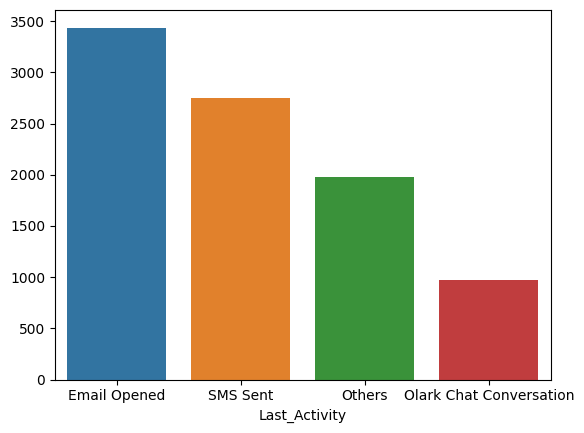

In [3530]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others'
    return data
data = group_low_value_counts(data, column_name = 'Last_Activity', threshold = 700)
bn = data.Last_Activity.value_counts()
sns.barplot(x = bn.index, y = bn.values)

### Specialization

In [3531]:
data.Specialization.value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [3532]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others'
    return data
data = group_low_value_counts(data, column_name = 'Specialization', threshold = 700)


<Axes: xlabel='Specialization'>

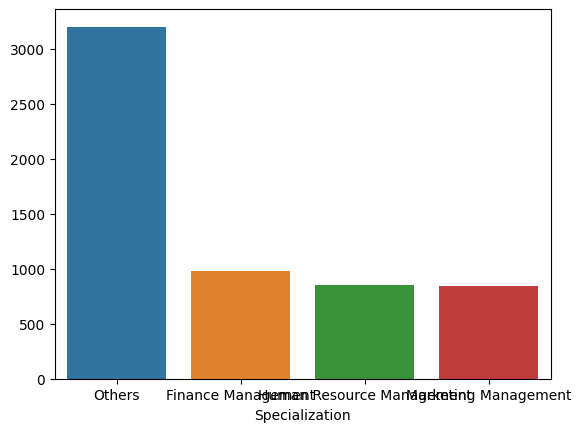

In [3533]:
bn = data.Specialization.value_counts()
sns.barplot(x = bn.index, y = bn.values)

### How_did_you_hear_about_X_Education

In [3534]:
data.How_did_you_hear_about_X_Education.value_counts()

How_did_you_hear_about_X_Education
Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: count, dtype: int64

In [3535]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others'
    return data
data = group_low_value_counts(data, column_name = 'How_did_you_hear_about_X_Education', threshold = 700)

<Axes: xlabel='How_did_you_hear_about_X_Education'>

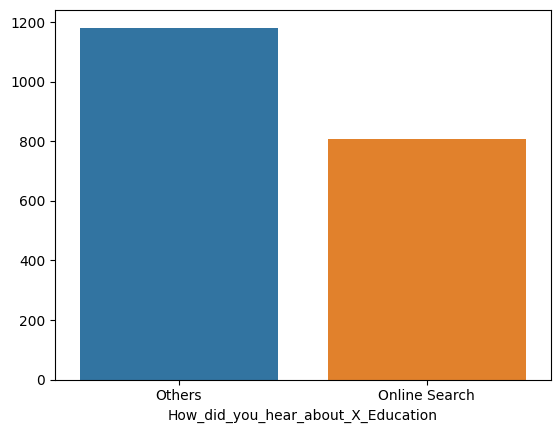

In [3536]:
bn = data.How_did_you_hear_about_X_Education.value_counts()
sns.barplot(x = bn.index, y = bn.values)

In [3537]:
data.Current_Occupation.value_counts()

Current_Occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [3538]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others'
    return data
data = group_low_value_counts(data, column_name = 'Current_Occupation', threshold = 700)

<Axes: xlabel='Current_Occupation'>

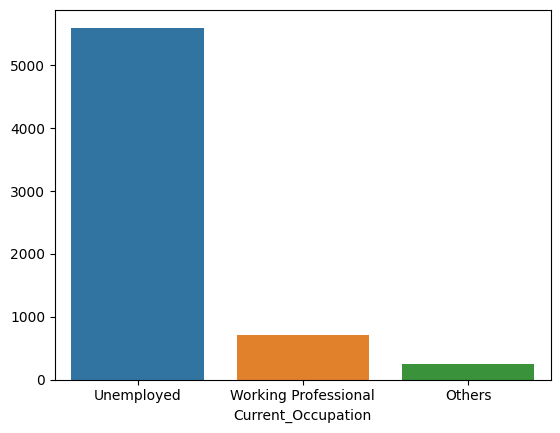

In [3539]:
bn = data.Current_Occupation.value_counts()
bn
sns.barplot(x = bn.index, y = bn.values)

### Tag

In [3540]:
data.Tags.value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [3541]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others'
    return data
data = group_low_value_counts(data, column_name = 'Tags', threshold = 700)

<Axes: xlabel='Tags'>

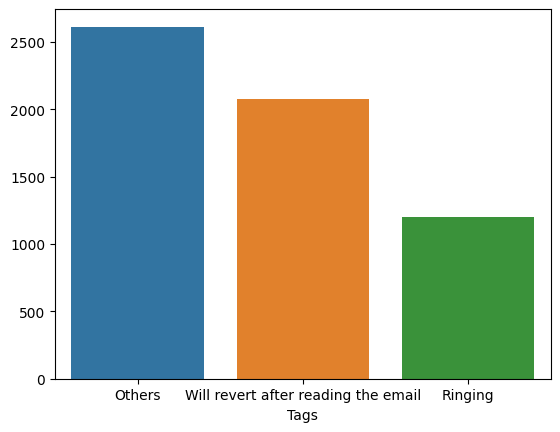

In [3542]:
bn = data.Tags.value_counts()
sns.barplot(x = bn.index, y = bn.values)

### Lead quality

In [3543]:
data.Lead_Quality.value_counts()

Lead_Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [3544]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others'
    return data
data = group_low_value_counts(data, column_name = 'Lead_Quality', threshold = 700)

<Axes: xlabel='Lead_Quality'>

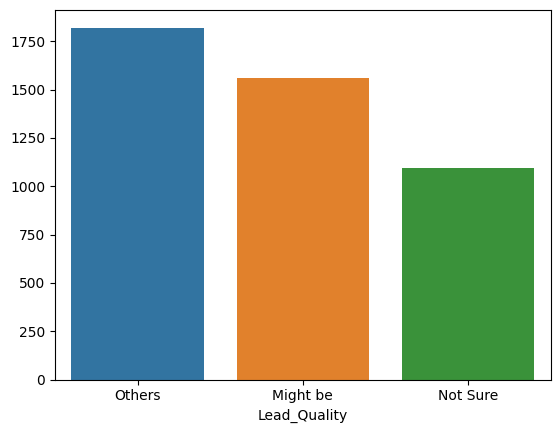

In [3545]:
bn = data.Lead_Quality.value_counts()
sns.barplot(x = bn.index, y = bn.values)

### Lead profile

In [3546]:
data.Lead_Profile.value_counts()


Lead_Profile
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [3547]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others'
    return data
data = group_low_value_counts(data, column_name = 'Lead_Profile', threshold = 700)

In [3548]:
bn = data.Lead_Profile.value_counts()

<Axes: xlabel='Lead_Profile'>

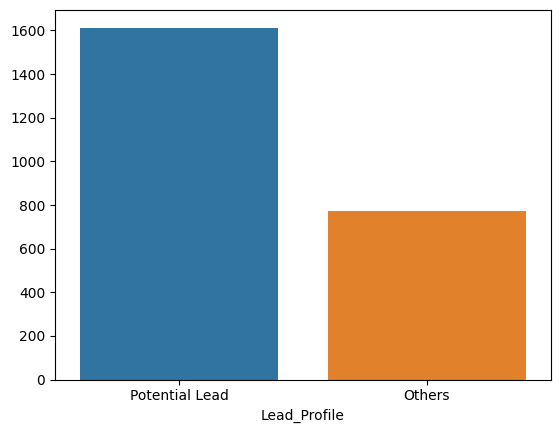

In [3549]:
sns.barplot(x = bn.index, y = bn.values)

### City

In [3550]:
data.City.value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [3551]:
def group_low_value_counts(data, column_name, threshold = 700):
    # Count the occurrences of each value in the column
    value_counts = data[column_name].value_counts()

    # Identify values with counts below the threshold
    low_value_counts = value_counts[value_counts < threshold].index

    # Replace those values with 'Others'
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others'

    return data

data = group_low_value_counts(data, 'City', threshold=700)

In [3552]:
bn = data.City.value_counts()

<Axes: xlabel='City'>

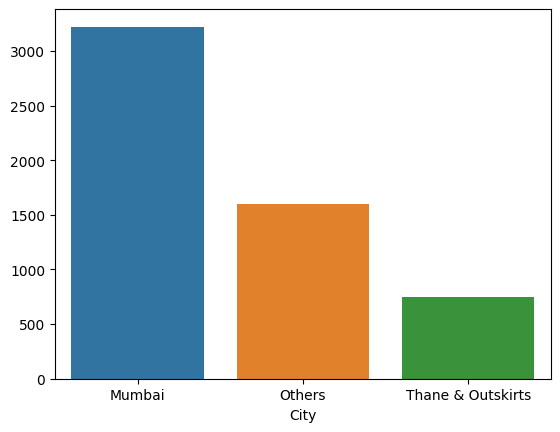

In [3553]:
sns.barplot(x=bn.index, y=bn.values)

In [3554]:
data.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [3555]:
def group_low_value_counts(data, column_name, threshold=700):
    # Count the occurrences of each value in the column
    value_counts = data[column_name].value_counts()

    # Identify values with counts below the threshold
    low_value_counts = value_counts[value_counts < threshold].index

    # Replace those values with 'Others'
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others'

    return data

data = group_low_value_counts(data, 'Country', threshold=700)

In [3556]:
bn = data.Country.value_counts()

<Axes: xlabel='Country'>

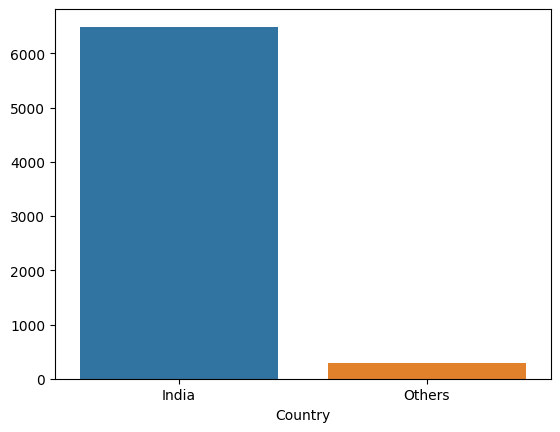

In [3557]:
sns.barplot(x=bn.index, y=bn.values)

### Dropping all skewed variable

In [3558]:
columns_to_drop = ['Prospect_ID','Update_on_DM_Content', 'Update_on_Supply_Chain_Content', 'Receive_More_Updates', 'Through_Recommendations', 'Digital_Advertisement', 'Search', 'Matters_Most_Choosing_Course', 'Newspaper', 'X_Education_Forums', 'Do_Not_Call', 'Newspaper_Article', 'Agree_to_Pay_Cheque', 'Do_Not_Email', 'Asymmetrique_Profile_Index', 'Asymmetrique_Activity_Index', 'Lead_Origin', 'Current_Occupation','Magazine', 'Free_Copy_Mastering_The_Interview']
data = data.drop(columns_to_drop, axis=1)

In [3559]:
data.columns

Index(['Lead_Number', 'Lead_Source', 'Converted', 'Total_Visits',
       'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity',
       'Country', 'Specialization', 'How_did_you_hear_about_X_Education',
       'Tags', 'Lead_Quality', 'Lead_Profile', 'City',
       'Asymmetrique_Activity_Score', 'Asymmetrique_Profile_Score',
       'Last_Notable_Activity'],
      dtype='object')

In [3560]:
data.shape

(9240, 17)

In [3561]:
data.head()

,Lead_Number,Lead_Source,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,Specialization,How_did_you_hear_about_X_Education,Tags,Lead_Quality,Lead_Profile,City,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,Last_Notable_Activity
0,660737,Olark Chat,0,0.0,0,0.0,Others,NaN,NaN,NaN,Others,Others,NaN,NaN,15.0,15.0,Modified
1,660728,Organic Search,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Ringing,NaN,NaN,NaN,15.0,15.0,Email Opened
2,660727,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Others,NaN,Will revert after reading the email,Might be,Potential Lead,Mumbai,14.0,20.0,Email Opened
3,660719,Direct Traffic,0,1.0,305,1.0,Others,India,Others,Others,Ringing,Not Sure,NaN,Mumbai,13.0,17.0,Modified
4,660681,Google,1,2.0,1428,1.0,Others,India,NaN,Others,Will revert after reading the email,Might be,NaN,Mumbai,15.0,18.0,Modified


### Finding the categorical variable containing missing values

In [3562]:
categorical_missing_values = [var for var in data.columns if data[var].isnull().sum() != 0]
print (data[categorical_missing_values].isnull().sum())

Lead_Source                             36
Total_Visits                           137
Page_Views_Per_Visit                   137
Last_Activity                          103
Country                               2461
Specialization                        3380
How_did_you_hear_about_X_Education    7250
Tags                                  3353
Lead_Quality                          4767
Lead_Profile                          6855
City                                  3669
Asymmetrique_Activity_Score           4218
Asymmetrique_Profile_Score            4218
dtype: int64


In [3563]:
data[categorical_missing_values].columns

Index(['Lead_Source', 'Total_Visits', 'Page_Views_Per_Visit', 'Last_Activity',
       'Country', 'Specialization', 'How_did_you_hear_about_X_Education',
       'Tags', 'Lead_Quality', 'Lead_Profile', 'City',
       'Asymmetrique_Activity_Score', 'Asymmetrique_Profile_Score'],
      dtype='object')

In [3564]:
data[categorical_missing_values].head(10)

,Lead_Source,Total_Visits,Page_Views_Per_Visit,Last_Activity,Country,Specialization,How_did_you_hear_about_X_Education,Tags,Lead_Quality,Lead_Profile,City,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score
0,Olark Chat,0.0,0.0,Others,NaN,NaN,NaN,Others,Others,NaN,NaN,15.0,15.0
1,Organic Search,5.0,2.5,Email Opened,India,NaN,NaN,Ringing,NaN,NaN,NaN,15.0,15.0
2,Direct Traffic,2.0,2.0,Email Opened,India,Others,NaN,Will revert after reading the email,Might be,Potential Lead,Mumbai,14.0,20.0
3,Direct Traffic,1.0,1.0,Others,India,Others,Others,Ringing,Not Sure,NaN,Mumbai,13.0,17.0
4,Google,2.0,1.0,Others,India,NaN,Others,Will revert after reading the email,Might be,NaN,Mumbai,15.0,18.0
5,Olark Chat,0.0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0
6,Google,2.0,2.0,Email Opened,India,Others,Online Search,Will revert after reading the email,Others,Potential Lead,Mumbai,14.0,20.0
7,Olark Chat,0.0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,15.0
8,Direct Traffic,2.0,2.0,Email Opened,India,Others,NaN,NaN,NaN,NaN,Thane & Outskirts,14.0,14.0
9,Google,4.0,4.0,Email Opened,India,Finance Management,Others,NaN,NaN,NaN,Mumbai,13.0,16.0


In [3565]:
# # Assuming 'df' is your DataFrame containing the columns mentioned
# columns_to_fill_with_zero = ['Lead_Source', 'Total_Visits', 'Page_Views_Per_Visit', 'Last_Activity',
#                              'Country', 'Specialization', 'How_did_you_hear_about_X_Education',
#                              'Tags', 'Lead_Quality', 'Lead_Profile', 'City',
#                              'Asymmetrique_Activity_Score', 'Asymmetrique_Profile_Score']

# # Fill missing values in the specified columns with 0
# df[columns_to_fill_with_zero] = df[columns_to_fill_with_zero].fillna(0)

# # Display the DataFrame after filling missing values with 0
# print(df)


In [3566]:
data.isnull().sum()


Lead_Number                              0
Lead_Source                             36
Converted                                0
Total_Visits                           137
Total_Time_Spent_on_Website              0
Page_Views_Per_Visit                   137
Last_Activity                          103
Country                               2461
Specialization                        3380
How_did_you_hear_about_X_Education    7250
Tags                                  3353
Lead_Quality                          4767
Lead_Profile                          6855
City                                  3669
Asymmetrique_Activity_Score           4218
Asymmetrique_Profile_Score            4218
Last_Notable_Activity                    0
dtype: int64

In [3567]:
data.head(10)

,Lead_Number,Lead_Source,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,Specialization,How_did_you_hear_about_X_Education,Tags,Lead_Quality,Lead_Profile,City,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,Last_Notable_Activity
0,660737,Olark Chat,0,0.0,0,0.0,Others,NaN,NaN,NaN,Others,Others,NaN,NaN,15.0,15.0,Modified
1,660728,Organic Search,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Ringing,NaN,NaN,NaN,15.0,15.0,Email Opened
2,660727,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Others,NaN,Will revert after reading the email,Might be,Potential Lead,Mumbai,14.0,20.0,Email Opened
3,660719,Direct Traffic,0,1.0,305,1.0,Others,India,Others,Others,Ringing,Not Sure,NaN,Mumbai,13.0,17.0,Modified
4,660681,Google,1,2.0,1428,1.0,Others,India,NaN,Others,Will revert after reading the email,Might be,NaN,Mumbai,15.0,18.0,Modified
5,660680,Olark Chat,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0,Modified
6,660673,Google,1,2.0,1640,2.0,Email Opened,India,Others,Online Search,Will revert after reading the email,Others,Potential Lead,Mumbai,14.0,20.0,Modified
7,660664,Olark Chat,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,15.0,Modified
8,660624,Direct Traffic,0,2.0,71,2.0,Email Opened,India,Others,NaN,NaN,NaN,NaN,Thane & Outskirts,14.0,14.0,Email Opened
9,660616,Google,0,4.0,58,4.0,Email Opened,India,Finance Management,Others,NaN,NaN,NaN,Mumbai,13.0,16.0,Email Opened


### Removing rows with Nan value

In [3568]:

data.dropna(inplace=True)
# Remove rows where all values are NaN in-place
data.dropna(how='all', inplace=True)

In [3569]:
data.head(5)

,Lead_Number,Lead_Source,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,Specialization,How_did_you_hear_about_X_Education,Tags,Lead_Quality,Lead_Profile,City,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,Last_Notable_Activity
6,660673,Google,1,2.0,1640,2.0,Email Opened,India,Others,Online Search,Will revert after reading the email,Others,Potential Lead,Mumbai,14.0,20.0,Modified
22,660471,Google,1,1.0,1013,1.0,Others,India,Others,Others,Will revert after reading the email,Others,Potential Lead,Mumbai,15.0,20.0,Modified
27,660424,Google,1,6.0,1315,6.0,Email Opened,India,Others,Online Search,Will revert after reading the email,Others,Potential Lead,Mumbai,15.0,19.0,Email Opened
37,660267,Google,1,5.0,563,5.0,Email Opened,India,Finance Management,Others,Will revert after reading the email,Others,Potential Lead,Mumbai,13.0,20.0,Email Opened
39,660236,Google,1,4.0,25,4.0,Email Opened,India,Others,Others,Will revert after reading the email,Others,Potential Lead,Others,14.0,19.0,Email Opened


### Creating dummy variables for categorical variables

In [3570]:

# # Assuming 'data' is the original DataFrame containing your dataset
# categorical_columns = ['Lead_Source','Last_Activity',
#        'Country', 'Specialization', 'How_did_you_hear_about_X_Education',
#        'Tags', 'Lead_Quality', 'Lead_Profile', 'City', 'Last_Notable_Activity']

# # Create dummy variables for the categorical columns
# df_dummies = pd.get_dummies(data[categorical_columns])
# df_dummies = df_dummies.astype(int)

# # Drop the original categorical columns from the 'data' DataFrame
# data.drop(columns=categorical_columns, inplace=True)




In [3571]:
lead_source_dummy = pd.get_dummies(data.Lead_Source, drop_first = True)
lead_source_dummy = lead_source_dummy.astype(int)
lead_source_dummy

,Google,Olark Chat,Organic Search,Others
6,1,0,0,0
22,1,0,0,0
27,1,0,0,0
37,1,0,0,0
39,1,0,0,0
...,...,...,...,...
9210,0,0,0,0
9211,0,0,0,0
9222,1,0,0,0
9227,1,0,0,0


In [3572]:
Last_Activity_dummy = pd.get_dummies(data.Last_Activity, drop_first = True)
Last_Activity_dummy = Last_Activity_dummy.astype(int)
Last_Activity_dummy

,Olark Chat Conversation,Others,SMS Sent
6,0,0,0
22,0,1,0
27,0,0,0
37,0,0,0
39,0,0,0
...,...,...,...
9210,0,1,0
9211,0,0,1
9222,0,0,1
9227,0,0,0


In [3573]:
Country_dummy = pd.get_dummies(data.Country, drop_first = True)
Country_dummy = Country_dummy.astype(int)
Country_dummy

,Others
6,0
22,0
27,0
37,0
39,0
...,...
9210,0
9211,0
9222,0
9227,0


In [3574]:
Specialization_dummy = pd.get_dummies(data.Specialization, drop_first = True)
Specialization_dummy = Specialization_dummy.astype(int)
Specialization_dummy

,Human Resource Management,Marketing Management,Others
6,0,0,1
22,0,0,1
27,0,0,1
37,0,0,0
39,0,0,1
...,...,...,...
9210,0,0,1
9211,0,0,1
9222,0,0,1
9227,0,0,1


In [3575]:
How_did_you_hear_about_X_Education_dummy = pd.get_dummies(data.How_did_you_hear_about_X_Education, drop_first = True)
How_did_you_hear_about_X_Education_dummy = How_did_you_hear_about_X_Education_dummy.astype(int)
How_did_you_hear_about_X_Education_dummy

,Others
6,0
22,1
27,0
37,1
39,1
...,...
9210,0
9211,0
9222,0
9227,0


In [3576]:
data.How_did_you_hear_about_X_Education.value_counts()

How_did_you_hear_about_X_Education
Others           167
Online Search    131
Name: count, dtype: int64

In [3577]:
Tags_dummy = pd.get_dummies(data.Tags, drop_first = True)
Tags_dummy = Tags_dummy.astype(int)
Tags_dummy

,Ringing,Will revert after reading the email
6,0,1
22,0,1
27,0,1
37,0,1
39,0,1
...,...,...
9210,0,1
9211,0,1
9222,0,1
9227,0,1


In [3578]:
Lead_Quality_dummy = pd.get_dummies(data.Lead_Quality, drop_first = True)
Lead_Quality_dummy = Lead_Quality_dummy.astype(int)
Lead_Quality_dummy

,Not Sure,Others
6,0,1
22,0,1
27,0,1
37,0,1
39,0,1
...,...,...
9210,0,0
9211,0,0
9222,0,1
9227,0,0


In [3579]:
#'Lead_Profile', 'City', 'Last_Notable_Activity'
Lead_Profile_dummy = pd.get_dummies(data.Lead_Profile, drop_first = True)
Lead_Profile_dummy = Lead_Profile_dummy.astype(int)
Lead_Profile_dummy

,Potential Lead
6,1
22,1
27,1
37,1
39,1
...,...
9210,1
9211,0
9222,1
9227,1


In [3580]:
City_dummy = pd.get_dummies(data.City, drop_first = True)
City_dummy = City_dummy.astype(int)
City_dummy

,Others,Thane & Outskirts
6,0,0
22,0,0
27,0,0
37,0,0
39,1,0
...,...,...
9210,0,0
9211,0,0
9222,1,0
9227,0,0


In [3581]:
Last_Notable_Activity_dummy = pd.get_dummies(data.Last_Notable_Activity, drop_first = True)
Last_Notable_Activity_dummy = Last_Notable_Activity_dummy.astype(int)
Last_Notable_Activity_dummy

,Modified,Others,SMS Sent
6,1,0,0
22,1,0,0
27,0,0,0
37,0,0,0
39,0,0,0
...,...,...,...
9210,1,0,0
9211,0,0,1
9222,1,0,0
9227,0,0,0


In [3582]:
columns_to_drop = ['Lead_Source',  'Last_Activity',
                   'Country', 'Specialization', 'How_did_you_hear_about_X_Education',
                   'Tags', 'Lead_Quality', 'Lead_Profile', 'City', 'Last_Notable_Activity', 'Lead_Number']
data = data.drop(columns=columns_to_drop)

In [3583]:
dfs_to_concat = [lead_source_dummy, data, Last_Notable_Activity_dummy, City_dummy, Lead_Profile_dummy, Lead_Quality_dummy, Tags_dummy, How_did_you_hear_about_X_Education_dummy, Specialization_dummy, Country_dummy, Last_Activity_dummy]

# Concatenate the DataFrames along the columns (axis=1)
df = pd.concat(dfs_to_concat, axis=1)

In [3584]:
df.head(5)

,Google,Olark Chat,Organic Search,Others,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,...,Ringing,Will revert after reading the email,Others,Human Resource Management,Marketing Management,Others,Others,Olark Chat Conversation,Others,SMS Sent
6,1,0,0,0,1,2.0,1640,2.0,14.0,20.0,...,0,1,0,0,0,1,0,0,0,0
22,1,0,0,0,1,1.0,1013,1.0,15.0,20.0,...,0,1,1,0,0,1,0,0,1,0
27,1,0,0,0,1,6.0,1315,6.0,15.0,19.0,...,0,1,0,0,0,1,0,0,0,0
37,1,0,0,0,1,5.0,563,5.0,13.0,20.0,...,0,1,1,0,0,0,0,0,0,0
39,1,0,0,0,1,4.0,25,4.0,14.0,19.0,...,0,1,1,0,0,1,0,0,0,0


In [3585]:
df.head(10)

,Google,Olark Chat,Organic Search,Others,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,...,Ringing,Will revert after reading the email,Others,Human Resource Management,Marketing Management,Others,Others,Olark Chat Conversation,Others,SMS Sent
6,1,0,0,0,1,2.0,1640,2.0,14.0,20.0,...,0,1,0,0,0,1,0,0,0,0
22,1,0,0,0,1,1.0,1013,1.0,15.0,20.0,...,0,1,1,0,0,1,0,0,1,0
27,1,0,0,0,1,6.0,1315,6.0,15.0,19.0,...,0,1,0,0,0,1,0,0,0,0
37,1,0,0,0,1,5.0,563,5.0,13.0,20.0,...,0,1,1,0,0,0,0,0,0,0
39,1,0,0,0,1,4.0,25,4.0,14.0,19.0,...,0,1,1,0,0,1,0,0,0,0
41,0,0,1,0,0,7.0,38,7.0,13.0,18.0,...,0,0,1,0,0,1,0,0,1,0
56,0,0,0,1,1,13.0,436,13.0,15.0,13.0,...,0,0,0,0,0,1,0,0,1,0
60,1,0,0,0,0,4.0,213,4.0,13.0,16.0,...,0,0,1,0,0,1,0,0,1,0
76,1,0,0,0,1,6.0,595,3.0,14.0,20.0,...,0,1,1,0,0,1,0,0,0,0
135,1,0,0,0,1,5.0,1091,5.0,13.0,20.0,...,0,1,0,0,0,0,0,0,1,0


### Finding columns with numeric values

In [3586]:
# Assuming 'data' is the DataFrame containing your dataset
numeric_data = [var for var in data.columns if data[var].dtype != 'O'] # dtype != 'O' selects non-object columns

print('The total non-categorical variables are {}'.format(len(numeric_data)))
print(numeric_data)


The total non-categorical variables are 6
['Converted', 'Total_Visits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Asymmetrique_Activity_Score', 'Asymmetrique_Profile_Score']


In [3587]:
df[numeric_data].head(5)

,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score
6,1,2.0,1640,2.0,14.0,20.0
22,1,1.0,1013,1.0,15.0,20.0
27,1,6.0,1315,6.0,15.0,19.0
37,1,5.0,563,5.0,13.0,20.0
39,1,4.0,25,4.0,14.0,19.0


### Understanding numeric variables and finding null value

### finding null values

### Data normalization

In [3588]:
scaler = MinMaxScaler()
normalized_data = ['Lead_Number', 'Total_Visits', 'Total_Time_Spent_on_Website',
                   'Page_Views_Per_Visit', 'Asymmetrique_Activity_Score', 'Asymmetrique_Profile_Score', 'Converted']
df[numeric_data] = scaler.fit_transform(df[numeric_data])
df

,Google,Olark Chat,Organic Search,Others,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,...,Ringing,Will revert after reading the email,Others,Human Resource Management,Marketing Management,Others,Others,Olark Chat Conversation,Others,SMS Sent
6,1,0,0,0,1.0,0.023810,0.784689,0.083333,0.666667,1.000000,...,0,1,0,0,0,1,0,0,0,0
22,1,0,0,0,1.0,0.000000,0.484689,0.000000,0.833333,1.000000,...,0,1,1,0,0,1,0,0,1,0
27,1,0,0,0,1.0,0.119048,0.629187,0.416667,0.833333,0.857143,...,0,1,0,0,0,1,0,0,0,0
37,1,0,0,0,1.0,0.095238,0.269378,0.333333,0.500000,1.000000,...,0,1,1,0,0,0,0,0,0,0
39,1,0,0,0,1.0,0.071429,0.011962,0.250000,0.666667,0.857143,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210,0,0,0,0,1.0,0.071429,0.443541,0.250000,0.666667,1.000000,...,0,1,0,0,0,1,0,0,1,0
9211,0,0,0,0,1.0,0.071429,0.532057,0.250000,0.833333,0.285714,...,0,1,0,0,0,1,0,0,0,1
9222,1,0,0,0,0.0,0.119048,0.109091,0.416667,0.833333,0.428571,...,0,1,0,0,0,1,0,0,0,1
9227,1,0,0,0,1.0,0.095238,0.613876,0.055833,0.833333,1.000000,...,0,1,0,0,0,1,0,0,0,0


### Understanding data shape 

In [3589]:
print(df.shape)



(298, 28)


### Understanding shape of new dataset

In [3590]:
df.head(10)

,Google,Olark Chat,Organic Search,Others,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,...,Ringing,Will revert after reading the email,Others,Human Resource Management,Marketing Management,Others,Others,Olark Chat Conversation,Others,SMS Sent
6,1,0,0,0,1.0,0.023810,0.784689,0.083333,0.666667,1.000000,...,0,1,0,0,0,1,0,0,0,0
22,1,0,0,0,1.0,0.000000,0.484689,0.000000,0.833333,1.000000,...,0,1,1,0,0,1,0,0,1,0
27,1,0,0,0,1.0,0.119048,0.629187,0.416667,0.833333,0.857143,...,0,1,0,0,0,1,0,0,0,0
37,1,0,0,0,1.0,0.095238,0.269378,0.333333,0.500000,1.000000,...,0,1,1,0,0,0,0,0,0,0
39,1,0,0,0,1.0,0.071429,0.011962,0.250000,0.666667,0.857143,...,0,1,1,0,0,1,0,0,0,0
41,0,0,1,0,0.0,0.142857,0.018182,0.500000,0.500000,0.714286,...,0,0,1,0,0,1,0,0,1,0
56,0,0,0,1,1.0,0.285714,0.208612,1.000000,0.833333,0.000000,...,0,0,0,0,0,1,0,0,1,0
60,1,0,0,0,0.0,0.071429,0.101914,0.250000,0.500000,0.428571,...,0,0,1,0,0,1,0,0,1,0
76,1,0,0,0,1.0,0.119048,0.284689,0.166667,0.666667,1.000000,...,0,1,1,0,0,1,0,0,0,0
135,1,0,0,0,1.0,0.095238,0.522010,0.333333,0.500000,1.000000,...,0,1,0,0,0,0,0,0,1,0


### Splitting into train and test

In [3591]:
train_data, test_data = train_test_split(df, train_size = 0.7, random_state = 100)
print(train_data.shape)
print(test_data.shape)

(208, 28)
(90, 28)


### Splitting train data into X and Y

In [3592]:
y_train = train_data.pop('Converted')
x_train = train_data
print(y_train)

3093    0.0
1994    1.0
9084    1.0
7627    1.0
2497    1.0
       ... 
1527    1.0
1340    1.0
1766    1.0
9138    1.0
76      1.0
Name: Converted, Length: 208, dtype: float64


In [3593]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.105506
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                  208
Model:                          Logit   Df Residuals:                      181
Method:                           MLE   Df Model:                           26
Date:                Mon, 31 Jul 2023   Pseudo R-squ.:                  0.8189
Time:                        16:11:40   Log-Likelihood:                -21.945
converged:                      False   LL-Null:                       -121.16
Covariance Type:            nonrobust   LLR p-value:                 1.762e-28
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Google                                 -2.3977      2.034     -1.179      0.239      -6.385   

/Users/mrbinit/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [3594]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = x_train.columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif


,variables,VIF
8,Asymmetrique_Profile_Score,21.53
7,Asymmetrique_Activity_Score,18.21
14,Potential Lead,9.10
0,Google,8.11
26,SMS Sent,5.85
11,SMS Sent,5.31
9,Modified,5.12
16,Others,5.11
18,Will revert after reading the email,4.82
5,Total_Time_Spent_on_Website,4.40


In [3595]:
import pandas as pd

# Assuming you have a DataFrame called df
# Replace 'inf' values with NaN
df.replace([float('inf')], pd.NA, inplace=True)

# Remove rows containing NaN values
df.dropna(inplace=True)


### Recursive feature elimination

In [3596]:
linear_model = LogisticRegression()
linear_model.fit(x_train, y_train)
recursive_feature_elimination = RFE(linear_model)
recursive_feature_elimination.n_features_to_select = 20
recursive_feature_elimination = recursive_feature_elimination.fit(x_train, y_train)

In [3597]:
list(zip(x_train.columns, recursive_feature_elimination.support_, recursive_feature_elimination.ranking_ ))

[('Google', False, 5),
 ('Olark Chat', False, 4),
 ('Organic Search', True, 1),
 ('Others', True, 1),
 ('Total_Visits', False, 6),
 ('Total_Time_Spent_on_Website', True, 1),
 ('Page_Views_Per_Visit', False, 2),
 ('Asymmetrique_Activity_Score', True, 1),
 ('Asymmetrique_Profile_Score', True, 1),
 ('Modified', True, 1),
 ('Others', True, 1),
 ('SMS Sent', True, 1),
 ('Others', True, 1),
 ('Thane & Outskirts', True, 1),
 ('Potential Lead', True, 1),
 ('Not Sure', True, 1),
 ('Others', True, 1),
 ('Ringing', True, 1),
 ('Will revert after reading the email', True, 1),
 ('Others', True, 1),
 ('Human Resource Management', True, 1),
 ('Marketing Management', True, 1),
 ('Others', False, 7),
 ('Others', False, 3),
 ('Olark Chat Conversation', True, 1),
 ('Others', False, 8),
 ('SMS Sent', True, 1)]

In [3598]:
col = x_train.columns[recursive_feature_elimination.support_]
col

Index(['Organic Search', 'Others', 'Total_Time_Spent_on_Website',
       'Asymmetrique_Activity_Score', 'Asymmetrique_Profile_Score', 'Modified',
       'Others', 'SMS Sent', 'Others', 'Thane & Outskirts', 'Potential Lead',
       'Not Sure', 'Others', 'Ringing', 'Will revert after reading the email',
       'Others', 'Human Resource Management', 'Marketing Management',
       'Olark Chat Conversation', 'SMS Sent'],
      dtype='object')

In [3599]:
final_data = x_train[col]
final_data.head()

,Organic Search,Others,Others,Others,Others,Others,Others,Others,Others,Total_Time_Spent_on_Website,...,Others,Others,Others,Others,Others,Human Resource Management,Marketing Management,Olark Chat Conversation,SMS Sent,SMS Sent
3093,0,0,1,0,0,0,1,0,1,0.167943,...,0,0,1,0,1,0,0,0,0,0
1994,0,0,0,1,1,0,0,0,0,0.332057,...,1,0,0,0,0,0,0,0,0,0
9084,0,0,0,1,0,1,1,0,0,0.560766,...,0,1,1,0,0,0,0,0,1,1
7627,0,0,0,0,1,0,0,0,0,0.890909,...,1,0,0,0,0,0,0,0,0,0
2497,0,0,0,1,0,0,1,0,0,0.889474,...,0,0,1,0,0,0,0,0,0,1


In [3600]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,final_data)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.113132
         Iterations: 35


LinAlgError: Singular matrix